
## Objectives
- Load and preprocess the dataset.
- Perform exploratory data analysis (EDA).
- Train classification models (Decision Tree & SVM).
- Evaluate and compare model performance.
- Discuss results and potential improvements.



## Data Loading
We begin by loading the credit card fraud dataset, which contains anonymized transaction features and a binary fraud label.


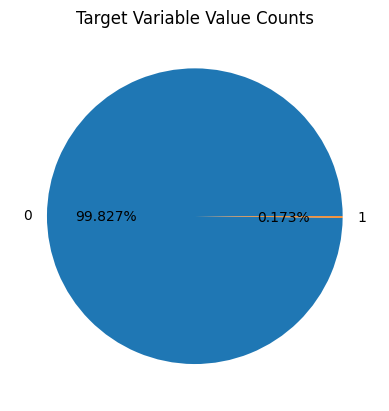

Decision Tree ROC-AUC score : 0.939
SVM ROC-AUC score: 0.986


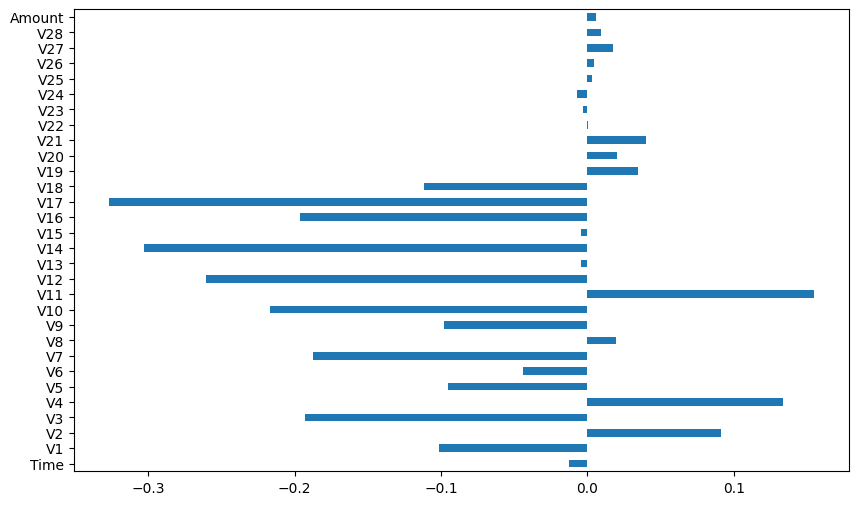

In [1]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

# get the set of distinct classes
labels = raw_data.Class.unique()

# get the count of each class
sizes = raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

# standardize features by removing the mean and scaling to unit variance
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

w_train = compute_sample_weight('balanced', y_train)

# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

y_pred_dt = dt.predict_proba(X_test)[:,1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

y_pred_svm = svm.decision_function(X_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))




## Exploratory Data Analysis (EDA)
We explore the dataset to understand class imbalance and feature characteristics.



## Model Training: Decision Tree
We first train a **Decision Tree Classifier** to detect fraudulent transactions.



## Model Training: Support Vector Machine (SVM)
Next, we train an **SVM Classifier** and compare its performance to the Decision Tree.



## Model Evaluation & Comparison
We evaluate the classifiers using accuracy, confusion matrix, and classification report.  
Performance metrics are compared to determine which model performs better on fraud detection.



## Conclusion
Both Decision Tree and SVM are applied for fraud detection.  
Key takeaways:
- Fraud detection datasets are typically **imbalanced**, requiring careful evaluation.  
- SVM may generalize better, while Decision Trees offer interpretability.  
- Future improvements may include **ensemble methods** (Random Forest, XGBoost) and **resampling techniques** (SMOTE) to handle class imbalance.
